In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})
import numpy as np
import darksector as ds
import standardmodel as sm
import pickle

# Check a single run

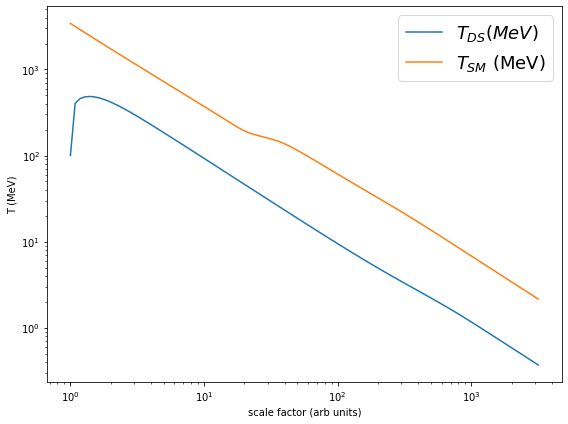

In [7]:
#import the results from results/test.npy
results = np.load('results/test.npy')
T_DS = results[0, 0, 0, :]
a_domain = np.logspace(2.5, 6., 100)
T_SM = ds.T_SM_func(a_domain)

fig, ax = plt.subplots(figsize=(8,6))
a_domain = a_domain/a_domain[0]


plt.loglog(a_domain, T_DS, label=r"$T_{DS} (MeV)$")
plt.loglog(a_domain, T_SM, label=r"$T_{SM}$ (MeV)")

plt.xlabel(r"scale factor (arb units)")
plt.ylabel(r"T (MeV)")
plt.tight_layout()
#plt.title(r'$m_{s1}$'+'={} MeV'.format(ms1) +', $m_{s2}$'+'={} MeV'.format(ms2) +r'$, sin^2(2\theta)$={}'.format(sinsq2theta))
plt.legend(fontsize=18)
plt.show()

ms1 = 100 MeV, ms2 = 0.01 MeV, sin^2(2theta) = 1e-13


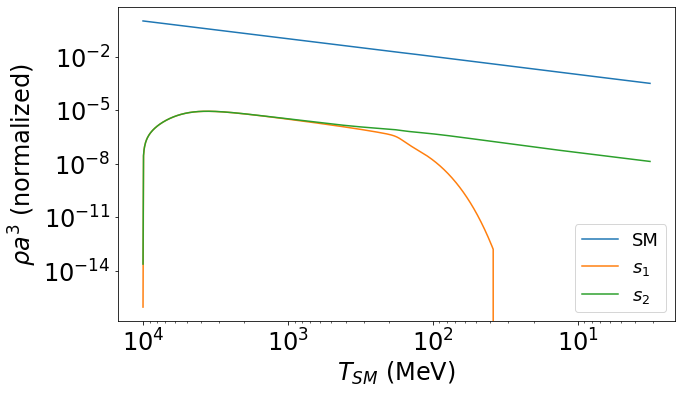

In [11]:
# import the data
with open('data/T_DS_results.pkl', 'rb') as file:
    data_dict = pickle.load(file)

# Get the single model parameters
ms1_idx, sinsq2theta_idx, ms2_idx = 6, 0, 0
ms1 = data_dict['ms1_values'][ms1_idx]
ms2 = data_dict['ms2_values'][ms2_idx]
sinsq2theta = data_dict['sinsq2theta_values'][sinsq2theta_idx]
print("ms1 = {} MeV, ms2 = {} MeV, sin^2(2theta) = {}".format(
    '{:.3g}'.format(ms1), '{:.3g}'.format(ms2), '{:.3g}'.format(sinsq2theta)))

# Get the dark sector energy density
T_DS = data_dict['T_DS_domain'][sinsq2theta_idx, ms1_idx, ms2_idx, :]
a_domain = data_dict['a_domain']
rho_s1 = 2*sm.compute_energy_density(T_DS, ms1, -1)*a_domain**3
rho_s2 = 2*sm.compute_energy_density(T_DS, ms2, -1)*a_domain**3

# get the SM energy density
T_SM = data_dict['T_SM_domain']
rho_sm = ds.energy_density_func(T_SM)*a_domain**3

# Plot
plt.figure(figsize=(10, 6))
plt.loglog(T_SM, rho_sm/rho_sm[0], label=r"SM")
plt.loglog(T_SM, rho_s1/rho_sm[0], label=r"$s_1$")
plt.loglog(T_SM, rho_s2/rho_sm[0], label=r"$s_2$")

plt.xlabel(r"$T_{SM}$ (MeV)")
plt.ylabel(r"$\rho a^3$ (normalized)")
plt.tight_layout()
plt.gca().invert_xaxis()
#plt.ylim(10**-7, 3)
plt.legend(fontsize=18)
plt.show()

# Check a grid of the final temperatures

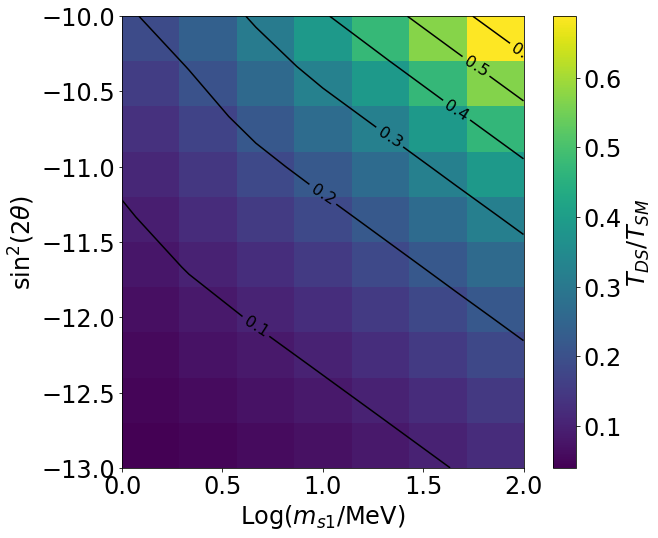

In [8]:
# Load a pickle file with the data
with open('data/T_DS_results.pkl', 'rb') as file:
    data_dict = pickle.load(file)

T_SM_final = data_dict['T_SM_domain'][-1]
temp_ratio = data_dict['T_DS_domain'][:,:,0,-1]/T_SM_final

plt.figure(figsize=(8,8))
im = plt.imshow(temp_ratio, origin='lower',
                  extent=[np.log10(data_dict['ms1_values'][0]), np.log10(data_dict['ms1_values'][-1]),
                                np.log10(data_dict['sinsq2theta_values'][0]), np.log10(data_dict['sinsq2theta_values'][-1])])

X, Y = np.meshgrid(np.log10(data_dict['ms1_values']), np.log10(data_dict['sinsq2theta_values']))
contours = plt.contour(X, Y, temp_ratio, colors='k')  # 'k' means black
plt.clabel(contours, inline=True, fontsize=16)

plt.xlabel(r'Log($m_{s1}$/MeV)')
plt.ylabel(r'$\sin^2(2 \theta)$')

cb = plt.colorbar(im)
cb.set_label(r'$T_{DS}/T_{SM}$')
plt.gca().set_aspect(0.75)
# Make the colorbar size the same as the plot
plt.gcf().set_size_inches(10, 8)
plt.tight_layout()
plt.show()

